<a href="https://colab.research.google.com/github/FaiazS/Wine_Quality_Prediction/blob/main/WineQualityPredictionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras import models, layers

In [2]:
#Loading the data

wine_data = load_wine()

x_feature = wine_data.data
y_label = wine_data.target

In [38]:
#Splitting the data into Training and Testing Data

x_train, x_test, y_train, y_test = train_test_split(x_feature, y_label, test_size = 0.2, random_state = 42)

In [42]:
#Pre-Processing the data via Z-scale Standardization
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [43]:
#Building the Model

wine_quality_model = models.Sequential([ layers.Dense(64, activation = 'relu', input_shape = (x_train.shape[1],)),

                                         layers.Dense(32, activation = 'relu'),

                                         layers.Dense(3, activation = 'softmax')])  #Multi-Class Classification

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
#Compiling the Model

wine_quality_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [45]:
#Training the Model

wine_quality_model.fit(x_train, y_train, epochs = 7, batch_size = 16, verbose = 1 ,validation_data = (x_test, y_test))

Epoch 1/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.2052 - loss: 1.1575 - val_accuracy: 0.4722 - val_loss: 1.0171
Epoch 2/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5747 - loss: 0.9060 - val_accuracy: 0.8056 - val_loss: 0.7849
Epoch 3/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7508 - loss: 0.7169 - val_accuracy: 0.9722 - val_loss: 0.5922
Epoch 4/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8877 - loss: 0.5314 - val_accuracy: 0.9722 - val_loss: 0.4371
Epoch 5/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9499 - loss: 0.3819 - val_accuracy: 0.9722 - val_loss: 0.3164
Epoch 6/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9575 - loss: 0.3101 - val_accuracy: 1.0000 - val_loss: 0.2272
Epoch 7/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9796 - loss: 0.2563 - val_accuracy: 1.0000 - val_loss: 0.1667


In [46]:
#Testing and Evaluating the Model

test_loss, test_accuracy = wine_quality_model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.1689


In [47]:
print(test_loss)

0.16674722731113434


In [48]:
print(test_accuracy)

1.0


Epoch 1/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9784 - loss: 0.1870 - val_accuracy: 1.0000 - val_loss: 0.1279
Epoch 2/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9785 - loss: 0.1610 - val_accuracy: 1.0000 - val_loss: 0.1015
Epoch 3/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9931 - loss: 0.1277 - val_accuracy: 1.0000 - val_loss: 0.0830
Epoch 4/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9969 - loss: 0.0874 - val_accuracy: 1.0000 - val_loss: 0.0693
Epoch 5/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9986 - loss: 0.0746 - val_accuracy: 1.0000 - val_loss: 0.0594
Epoch 6/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9816 - loss: 0.0843 - val_accuracy: 1.0000 - val_loss: 0.0510
Epoch 7/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9986 - loss: 0.0600 - val_accuracy: 1.0000 - val_loss: 0.0447


<ipython-input-49-6f415d475667>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


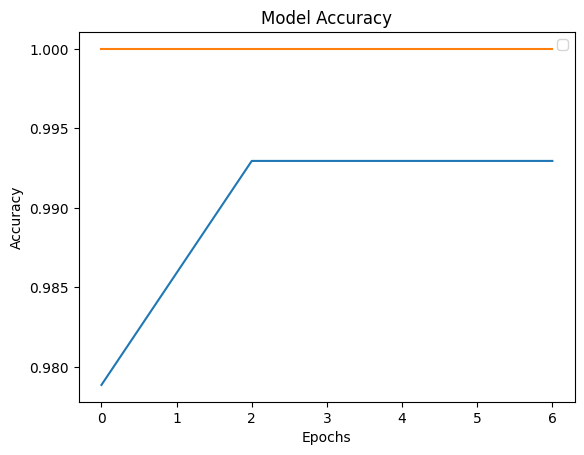

In [49]:
#Plotting the Training History

history = wine_quality_model.fit(x_train, y_train, epochs = 7, batch_size = 16, verbose = 1, validation_data = (x_test, y_test))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

In [50]:
#Making A Sample Prediction

sample_wine = np.expand_dims(x_test[0], axis = 0) #Extracting one test Sample
predicted_quality = np.argmax(wine_quality_model.predict(sample_wine))

print("Predicted quality " , predicted_quality)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Predicted quality  0
